In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 4 - Load and Explore Time Series Data

In [2]:
url1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-total-female-births.csv')
df = pd.read_csv(url1, header=0, index_col=0, parse_dates=True)

df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


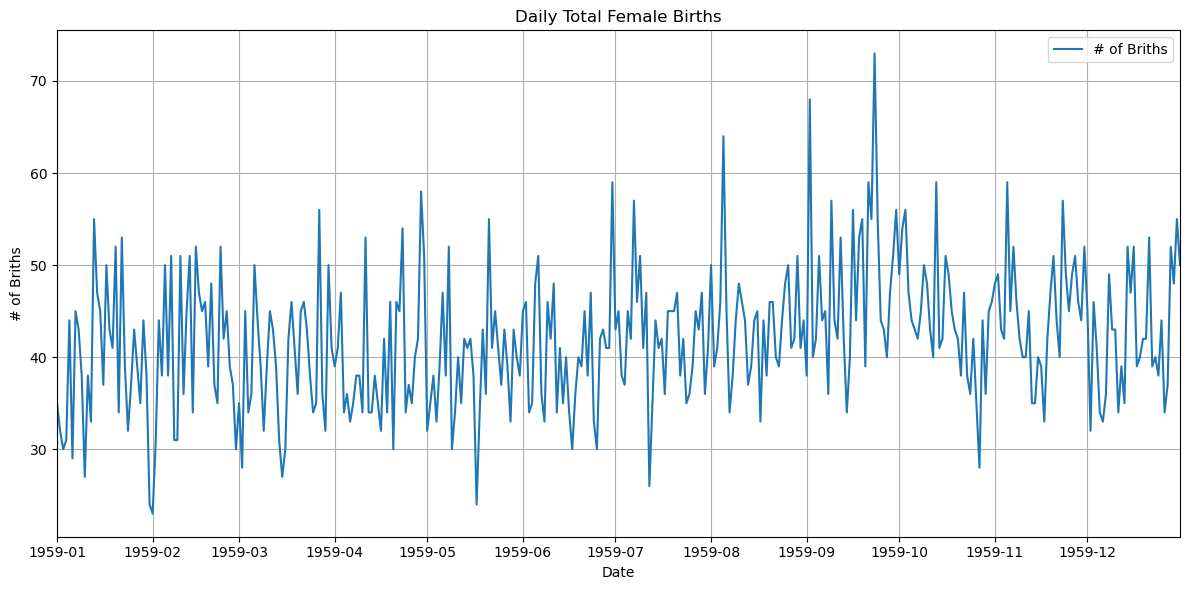

In [3]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Births'], label='# of Briths')     

plt.title('Daily Total Female Births')                      
plt.xlabel('Date')                                        
plt.ylabel('# of Briths')  
plt.xlim(pd.to_datetime('1959-01-01'), pd.to_datetime('1959-12-31'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

In [4]:
series = df['Births']

print(series.head())
print(type(series))

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64
<class 'pandas.core.series.Series'>


In [5]:
series.size

365

In [6]:
series['1959-01']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

In [7]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

# Chapter 5 - Basic Feature Engineering

In [8]:
from pandas import DataFrame

dataframe = DataFrame()

dataframe['month'] = [series.index[i].month for i in range(len(series))]    # Extract month from datetime index
dataframe['day'] = [series.index[i].day for i in range(len(series))]        # Extract day from datetime index
dataframe['temperature'] = [series.iloc[i] for i in range(len(series))]     # Access values safely using iloc

dataframe.head(5)

,month,day,temperature
0,1,1,35
1,1,2,32
2,1,3,30
3,1,4,31
4,1,5,44


In [9]:
from pandas import DataFrame, concat

temps = DataFrame(series.values)                      # Convert series to DataFrame
dataframe = concat([temps.shift(1), temps], axis=1)   # Combine shifted and original
dataframe.columns = ['t', 't+1']                      # Rename columns
dataframe.head(5)                                     # Show first 5 rows

,t,t+1
0,NaN,35
1,35.0,32
2,32.0,30
3,30.0,31
4,31.0,44


In [10]:
temps = DataFrame(series.values)
dataframe2 = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe2.columns = ['t-2', 't-1', 't', 't+1']
dataframe2.head(5)

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,35
1,NaN,NaN,35.0,32
2,NaN,35.0,32.0,30
3,35.0,32.0,30.0,31
4,32.0,30.0,31.0,44


In [11]:
temps = DataFrame(series.values)       # Convert the series to a DataFrame

shifted = temps.shift(1)               # Shift values down by 1 (previous time step)
window = shifted.rolling(window=2)     # Create a rolling window of size 2
means = window.mean()                  # Compute the rolling mean

dataframe3 = concat([means, temps], axis=1)  # Combine the rolling mean and current values
dataframe3.columns = ['mean(t-1,t)', 't+1']  # Rename the columns
dataframe3.head(5)                           # Display the first 5 rows

,"mean(t-1,t)",t+1
0,NaN,35
1,NaN,32
2,33.5,30
3,31.0,31
4,30.5,44


In [12]:
temps = DataFrame(series.values)

width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)

dataframe4 = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe4.columns = ['min', 'mean', 'max', 't+1']
dataframe4.head(10)

,min,mean,max,t+1
0,NaN,NaN,NaN,35
1,NaN,NaN,NaN,32
2,NaN,NaN,NaN,30
3,NaN,NaN,NaN,31
4,30.0,32.333333,35.0,44
5,30.0,31.000000,32.0,29
6,30.0,35.000000,44.0,45
7,29.0,34.666667,44.0,43
8,29.0,39.333333,45.0,38
9,29.0,39.000000,45.0,27


In [13]:
temps = DataFrame(series.values)   # Convert the time series to a DataFrame
window = temps.expanding()         # Create an expanding window object over the data

dataframe5 = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe5.columns = ['min', 'mean', 'max', 't+1']
dataframe5.head(5)

,min,mean,max,t+1
0,35.0,35.000000,35.0,32.0
1,32.0,33.500000,35.0,30.0
2,30.0,32.333333,35.0,31.0
3,30.0,32.000000,35.0,44.0
4,30.0,34.400000,44.0,29.0


In [14]:
35/1

35.0

In [15]:
(35+32)/2

33.5

In [16]:
(35+32+30)/3

32.333333333333336

In [17]:
(35+32+30+31)/4

32.0

In [18]:
(35+32+30+31+44)/5 

34.4

# Chapter 6 - Data Visualization

In [19]:
url2 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-min-temperatures.csv')
df2 = pd.read_csv(url2, header=0, index_col=0, parse_dates=True)

df2

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


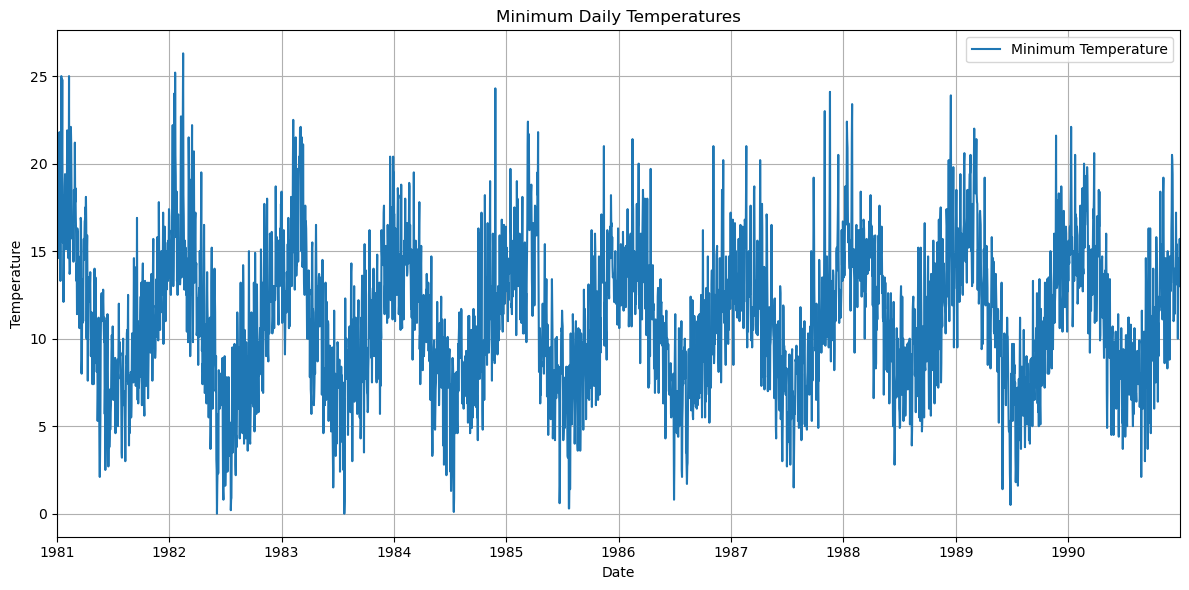

In [20]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df2.index, df2['Temp'], label='Minimum Temperature')     

plt.title('Minimum Daily Temperatures')                      
plt.xlabel('Date')                                        
plt.ylabel('Temperature')  
plt.xlim(pd.to_datetime('1981-01-01'), pd.to_datetime('1990-12-31'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

In [21]:
series2 = df2['Temp']

In [22]:
from pandas import Grouper, DataFrame

# Group the time series by year (frequency 'A' = annual)
groups = series2.groupby(Grouper(freq='YE'))

years = DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


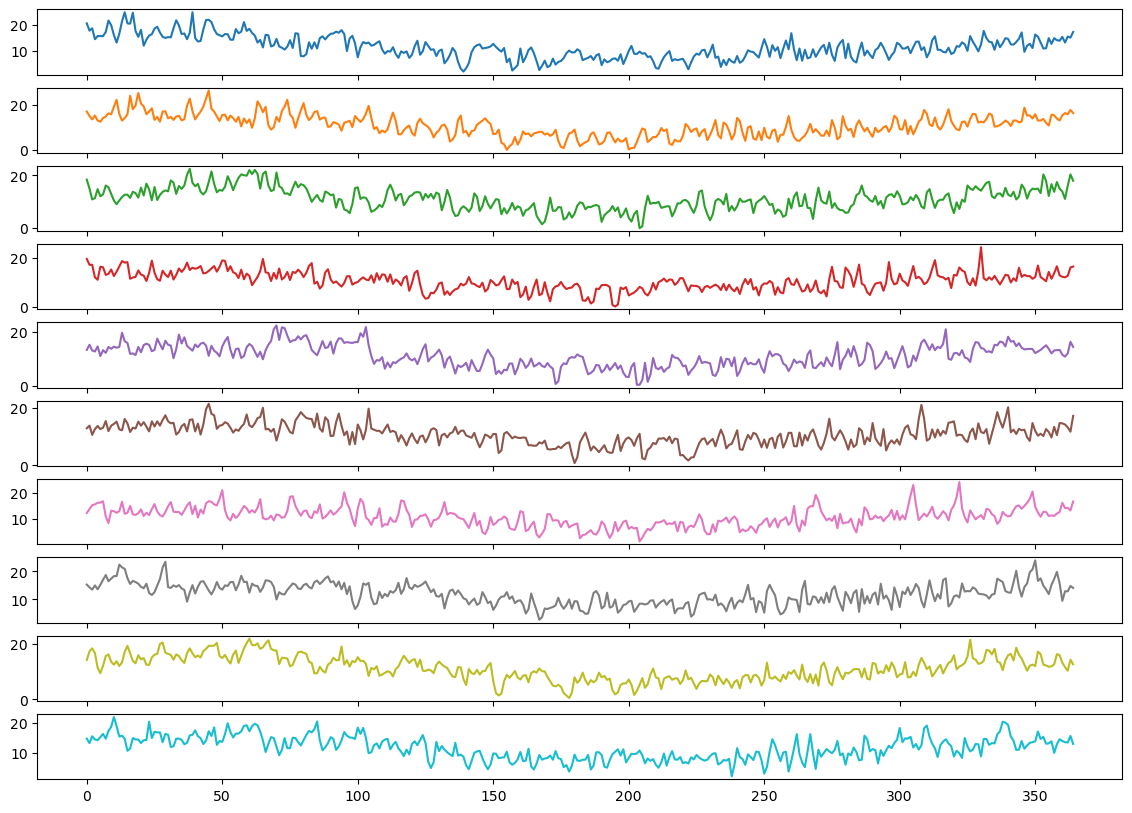

In [23]:
# Plot each year as a separate subplot 
years.plot(subplots=True, legend=False, figsize=(14, 10))
plt.show()

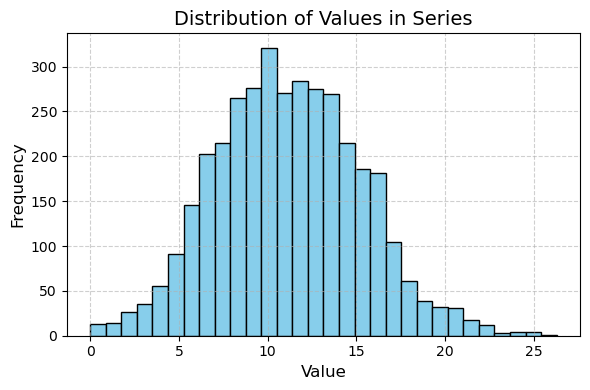

In [24]:
plt.figure(figsize=(6, 4))                                      # Set figure size
plt.hist(series2, bins=30, color='skyblue', edgecolor='black')  # Customize bins and colors
plt.title('Distribution of Values in Series', fontsize=14)      # Add title
plt.xlabel('Value', fontsize=12)                                # X-axis label
plt.ylabel('Frequency', fontsize=12)                            # Y-axis label
plt.grid(True, linestyle='--', alpha=0.6)                       # Add grid
plt.tight_layout()                                              # Adjust layout to avoid overlap
plt.show()                                                      # Show plot

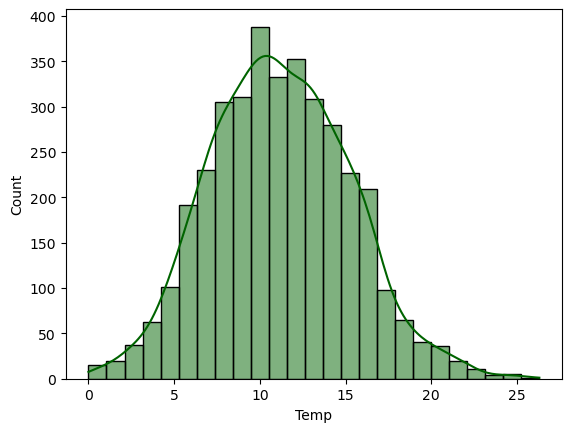

In [25]:
sns.histplot(series2, bins=25, edgecolor='black', color='darkgreen', kde=True)
plt.show();

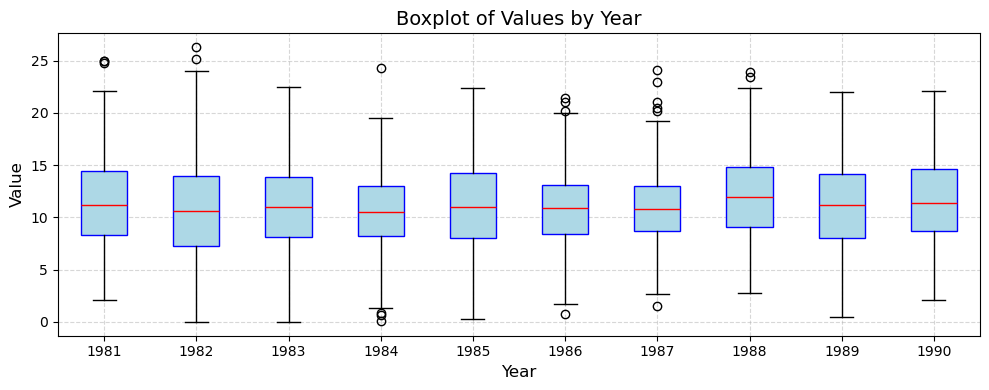

In [26]:
plt.figure(figsize=(10, 4))                            # Set figure size
years.boxplot(patch_artist=True,                       # Fill boxes with color
              boxprops=dict(facecolor='lightblue', color='blue'),   # Box style
              medianprops=dict(color='red'),           # Median line color
              whiskerprops=dict(color='black'),        # Whisker color
              capprops=dict(color='black'))            # Cap color
plt.title('Boxplot of Values by Year', fontsize=14)    # Add title
plt.xlabel('Year', fontsize=12)                        # X-axis label
plt.ylabel('Value', fontsize=12)                       # Y-axis label
plt.grid(True, linestyle='--', alpha=0.5)              # Add grid for readability
plt.tight_layout()                                     # Prevent layout overlap
plt.show()                                             # Display the plot

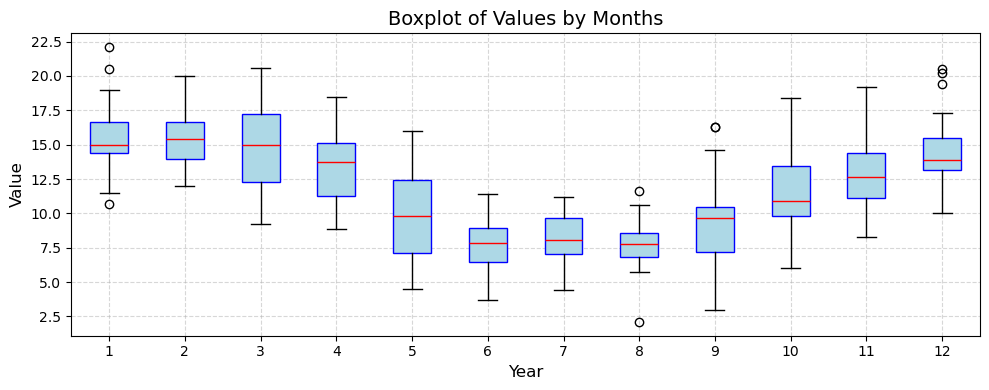

In [27]:
one_year = series2['1990']
groups = one_year.groupby(Grouper(freq='ME'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)

plt.figure(figsize=(10, 4))                           
months.boxplot(patch_artist=True,                       
              boxprops=dict(facecolor='lightblue', color='blue'),   
              medianprops=dict(color='red'),         
              whiskerprops=dict(color='black'),        
              capprops=dict(color='black'))            
plt.title('Boxplot of Values by Months', fontsize=14)    
plt.xlabel('Year', fontsize=12)                        
plt.ylabel('Value', fontsize=12)                       
plt.grid(True, linestyle='--', alpha=0.5)              
plt.tight_layout()                                     
plt.show()                                            

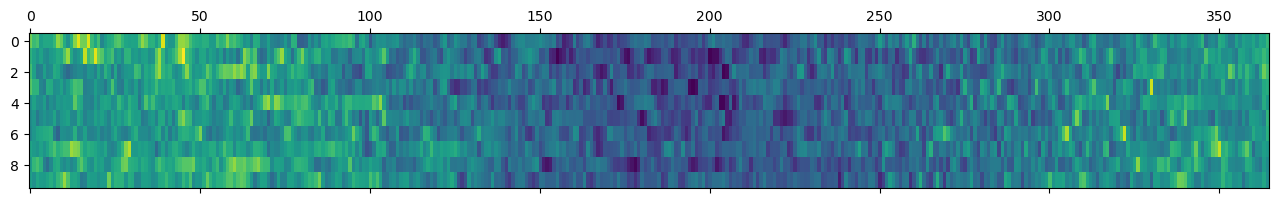

In [28]:
# Yearly Heat Map Plot on the Minimum Daily Temperatures dataset

years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

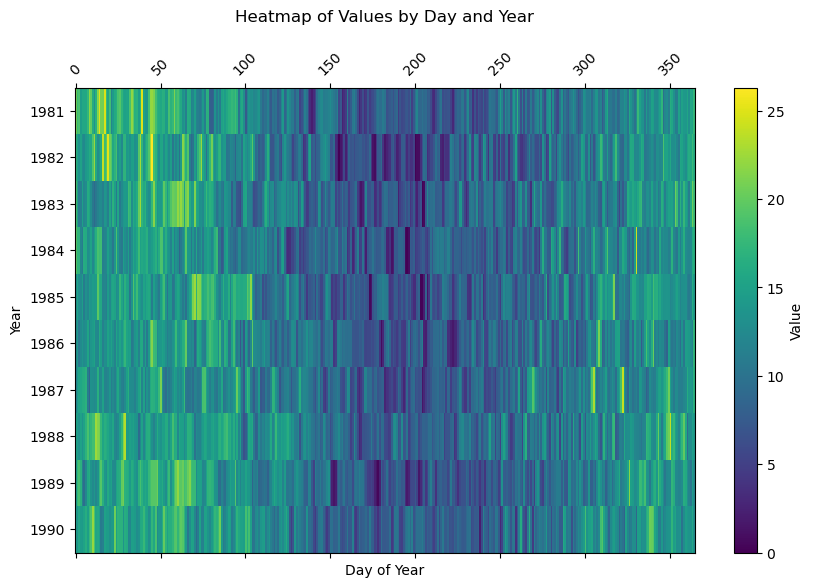

In [29]:
#years = years.T                                          

plt.figure(figsize=(10, 6))                              
plt.matshow(years, interpolation='nearest', aspect='auto', cmap='viridis', fignum=1)  
plt.title('Heatmap of Values by Day and Year', pad=20)   
plt.xlabel('Day of Year')                                
plt.ylabel('Year')                                       
plt.colorbar(label='Value')                             
plt.xticks(rotation=45)                                  
plt.yticks(ticks=range(len(years.index)), labels=years.index)                                  
plt.show()                                               

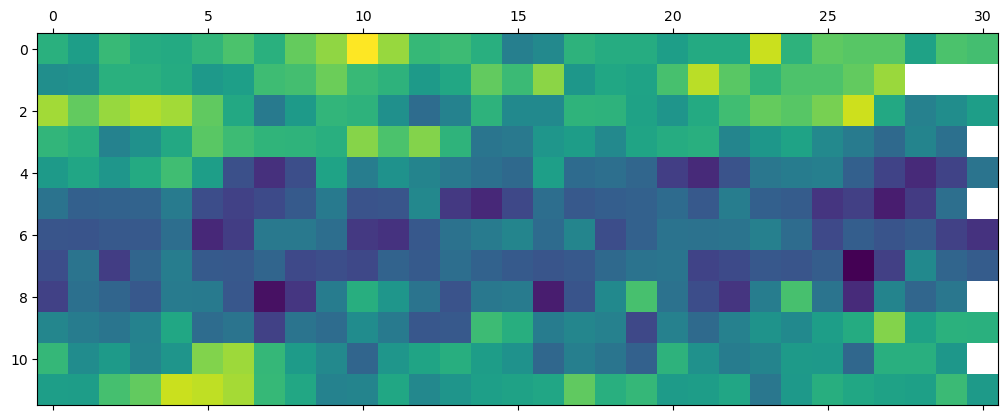

In [30]:
# Monthly Heat Map Plot on the Minimum Daily Temperatures dataset

months = months.T
plt.matshow(months, interpolation=None, aspect='auto')
plt.show(); 

<Figure size 1000x600 with 0 Axes>

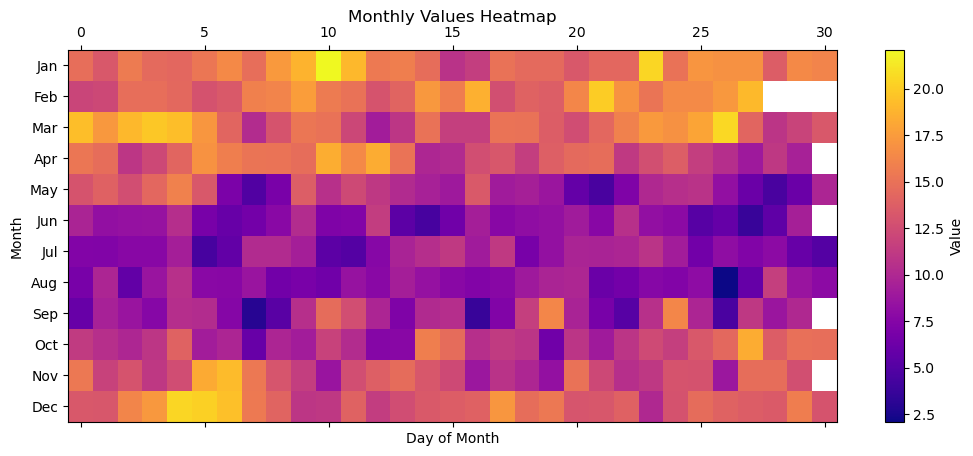

In [31]:
#months = months.T             # Transpose to have months as rows

plt.figure(figsize=(10, 6))                                          
plt.matshow(months, interpolation='nearest', aspect='auto', cmap='plasma') 
plt.title('Monthly Values Heatmap', pad=20)                         
plt.xlabel('Day of Month')                                           
plt.ylabel('Month')                                                  
plt.colorbar(label='Value')                                          

# Set y-ticks with month names (assuming index is numeric from 1 to 12)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(ticks=range(12), labels=month_names)

plt.show();                                                     

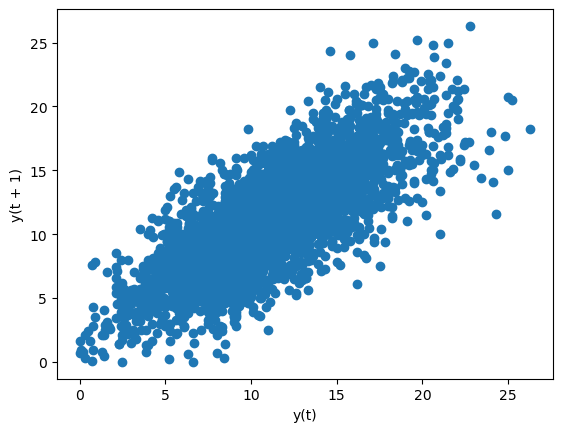

In [32]:
from pandas.plotting import lag_plot

lag_plot(series2)
plt.show()

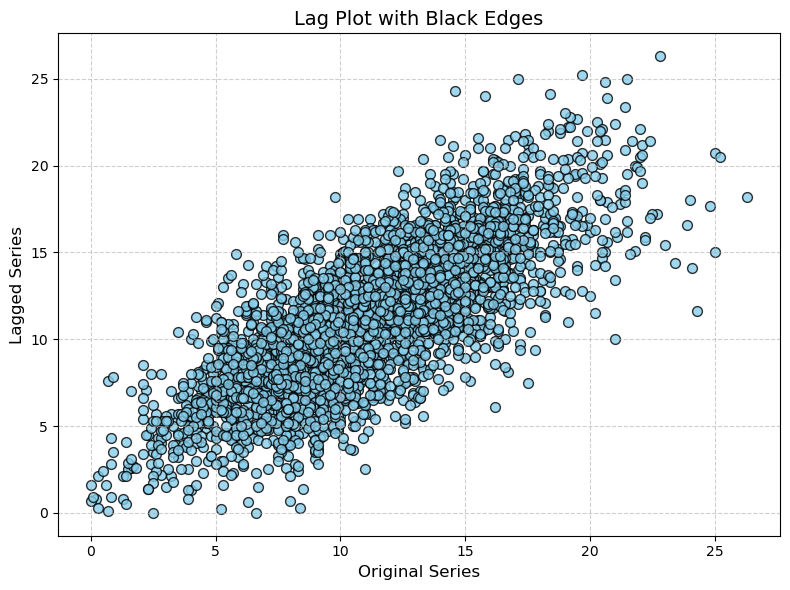

In [33]:
# Manually

# Create lagged values
x = series2[:-1]                 # Original values
y = series2[1:]                  # Lagged by 1

# Plot
plt.figure(figsize=(8, 6))       
plt.scatter(x, y, 
            edgecolors='black',  # Set black edge around each point
            facecolors='skyblue',# Inner color of the point
            alpha=0.8, 
            s=50)                # Size of the points

plt.title('Lag Plot with Black Edges', fontsize=14)
plt.xlabel('Original Series', fontsize=12)
plt.ylabel('Lagged Series', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

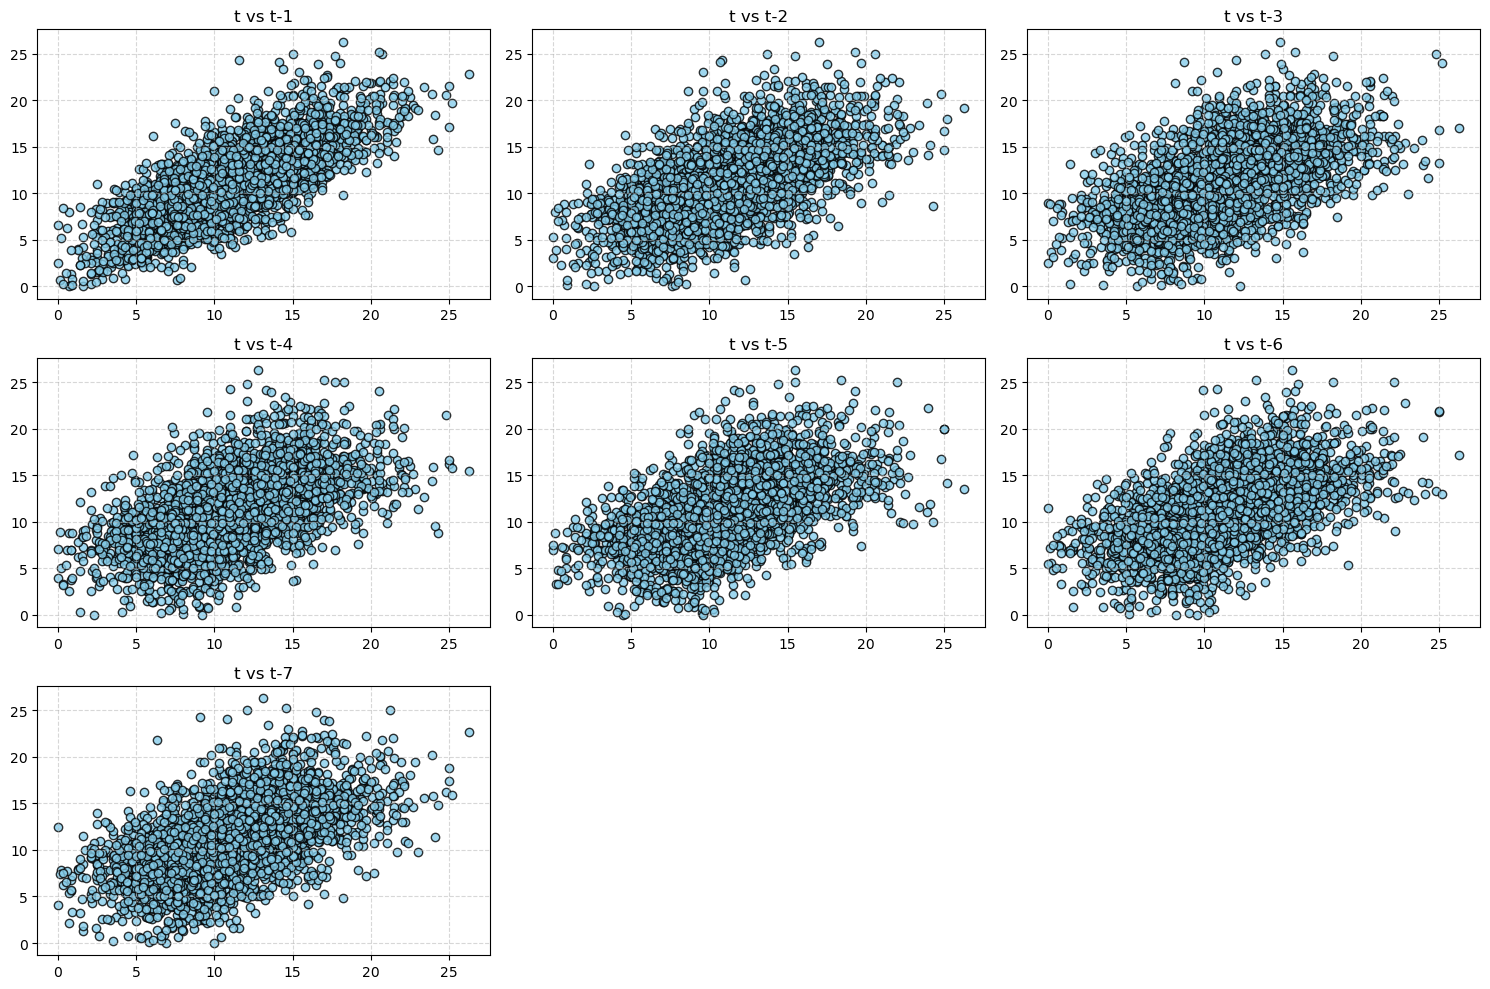

In [34]:
from pandas import DataFrame, concat

# Create lagged DataFrame
values = DataFrame(series2.values)
lags = 7
columns = [values]

# Create shifted lag columns
for i in range(1, lags + 1):
    columns.append(values.shift(i))

# Concatenate and name columns
dataframe = concat(columns, axis=1)
col_names = ['t'] + [f't-{i}' for i in range(1, lags + 1)]
dataframe.columns = col_names

# Drop NaN values caused by shifting
dataframe.dropna(inplace=True)

# Plot scatter plots: t vs t-i
plt.figure(figsize=(15, 10))
for i in range(1, lags + 1):
    ax = plt.subplot(3, 3, i)
    ax.set_title(f't vs t-{i}')
    ax.scatter(x=dataframe['t'].values, 
               y=dataframe[f't-{i}'].values,
               edgecolors='black', 
               facecolors='skyblue', 
               alpha=0.8)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

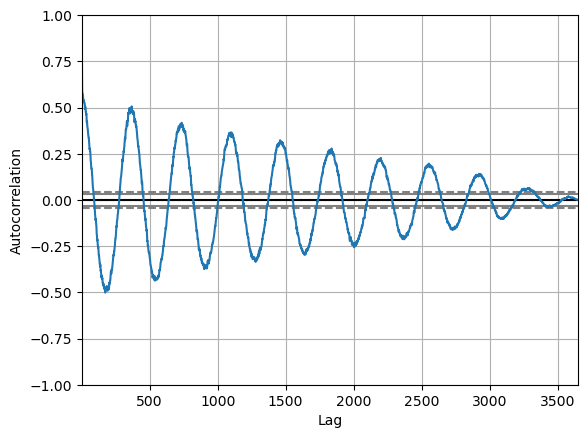

In [35]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series2)
plt.show()

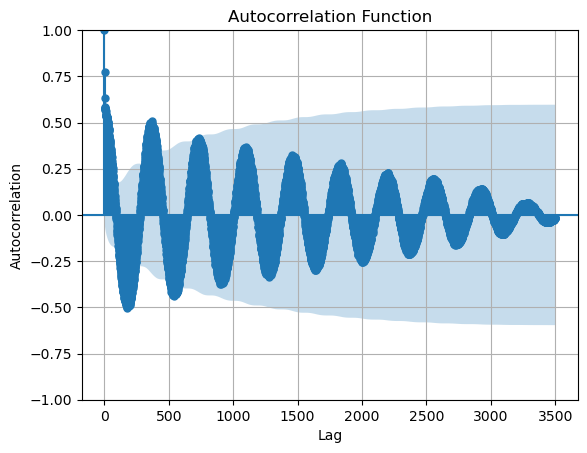

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series2, lags=3500)                    
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Chapter 7 - Resampling and Interpolation

In [37]:
from datetime import datetime

# Load the CSV without parsing dates
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)

# Convert 'Month' column to datetime using custom parser
df['Month'] = pd.to_datetime('190' + df['Month'], format='%Y-%m')

# Set it as the index
df.set_index('Month', inplace=True)

# Show result
df

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [38]:
series1 = df['Sales']

# Resample the time series to daily frequency, using the mean to fill in each day
upsampled = series1.resample('D').mean()

upsampled.head(32)

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64

In [39]:
interpolated = upsampled.interpolate(method='linear')

interpolated.head(32)

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

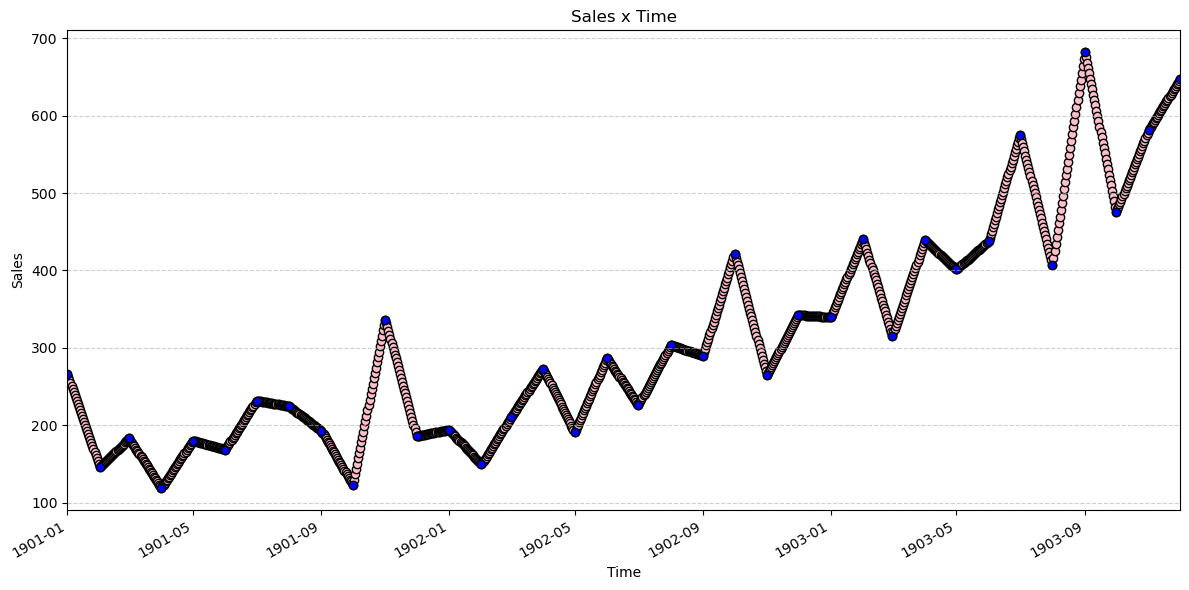

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(interpolated.index, interpolated.values, color='pink', edgecolors='black')
ax.scatter(series1.index, series1.values, color='blue', edgecolors='black')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales x Time')
ax.set_xlim(pd.to_datetime('1901-01-01'), pd.to_datetime('1903-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

In [41]:
polynomial = upsampled.interpolate(method='spline', order=2)

polynomial.head(32)

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64

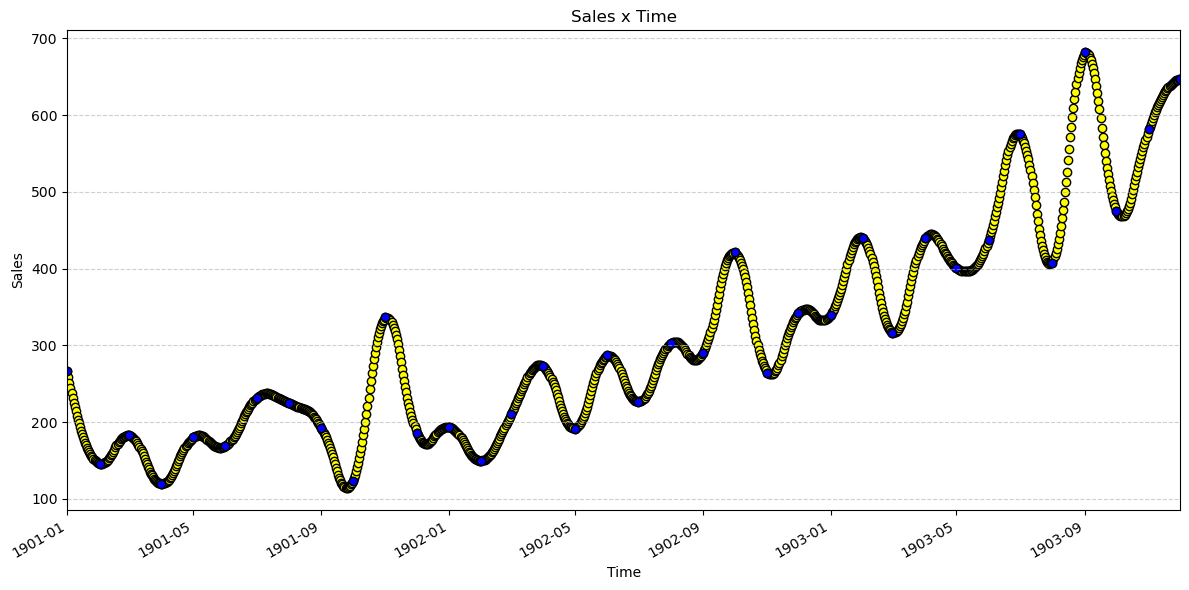

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(polynomial.index, polynomial.values, color='yellow', edgecolors='black')
ax.scatter(series1.index, series1.values, color='blue', edgecolors='black')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales x Time')
ax.set_xlim(pd.to_datetime('1901-01-01'), pd.to_datetime('1903-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

In [43]:
resample = series1.resample('QE')
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
1902-06-30    250.566667
1902-09-30    273.166667
1902-12-31    342.800000
1903-03-31    365.333333
1903-06-30    426.000000
1903-09-30    555.033333
1903-12-31    567.833333
Freq: QE-DEC, Name: Sales, dtype: float64

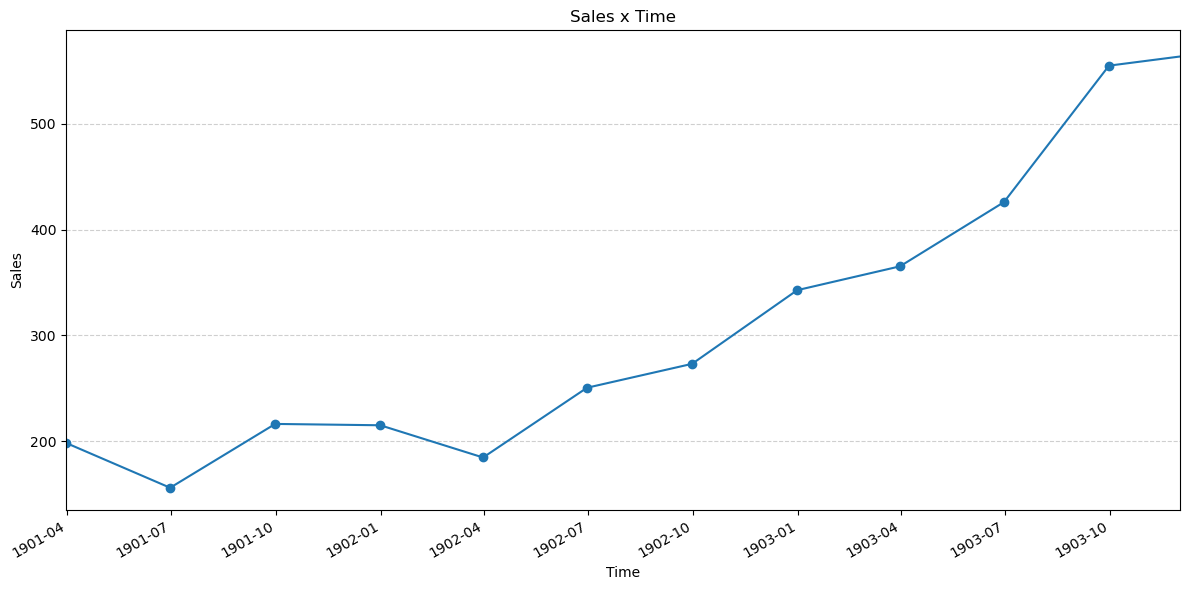

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(quarterly_mean_sales, marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Sales x Time')
ax.set_xlim(pd.to_datetime('1901-03-31'), pd.to_datetime('1903-12-01'))
ax.grid(axis='y', linestyle='--', alpha=0.6)  

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [45]:
resample = series1.resample('YE')
yearly_mean_sales = resample.sum()
yearly_mean_sales

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: YE-DEC, Name: Sales, dtype: float64

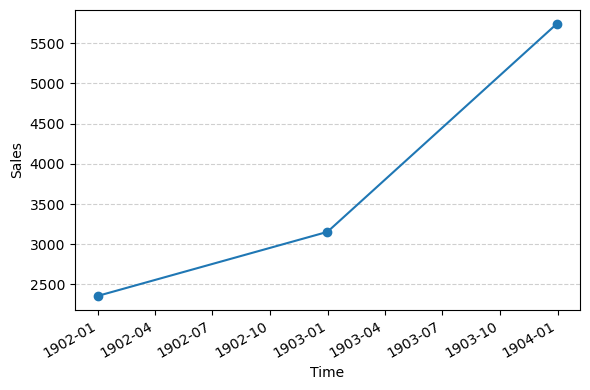

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(yearly_mean_sales, marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.grid(axis='y', linestyle='--', alpha=0.6)  
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


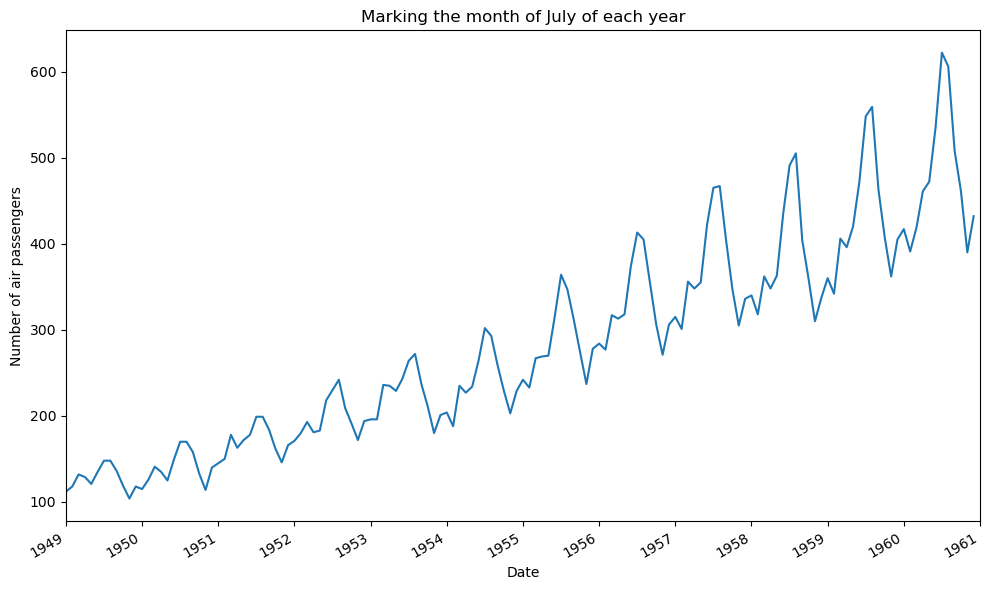

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.set_title('Marking the month of July of each year')
ax.set_xlim(0, 143)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

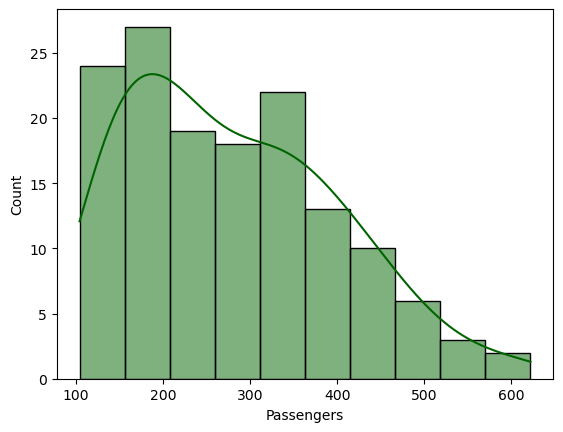

In [49]:
sns.histplot(df['Passengers'], bins=10, edgecolor='black', color='darkgreen', kde=True)
plt.show();

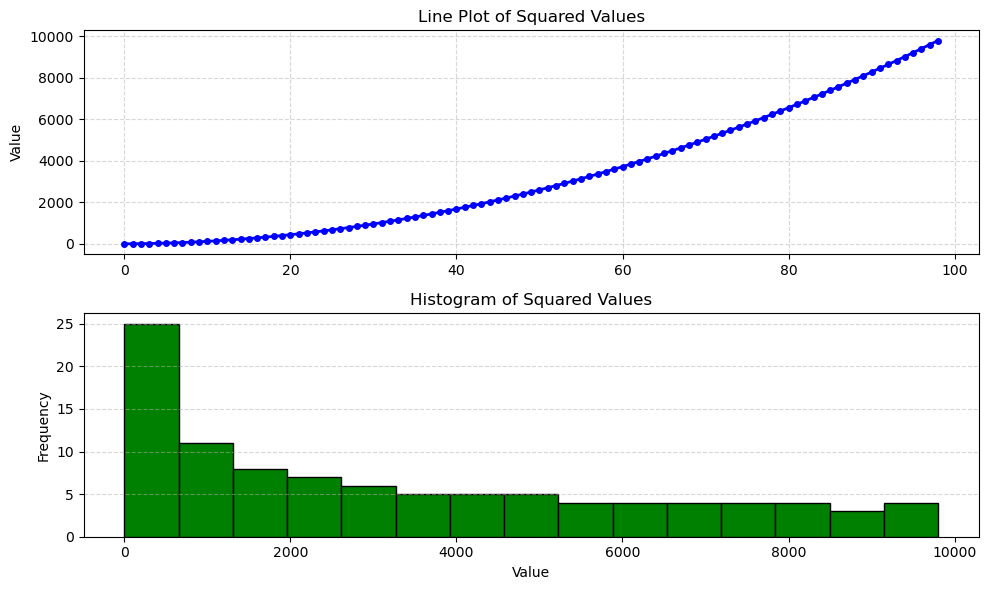

In [50]:
# Generate a synthetic series: squares from 1 to 99
series = [i**2 for i in range(1, 100)]

# Create the figure
plt.figure(figsize=(10, 6))  # Wider and taller plot

# Line plot (top)
plt.subplot(2, 1, 1)                       
plt.plot(series, color='blue', linewidth=2, marker='o', markersize=4)
plt.title('Line Plot of Squared Values')     
plt.ylabel('Value')                         
plt.grid(True, linestyle='--', alpha=0.5)    

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
plt.hist(series, bins=15, color='green', edgecolor='black')
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()

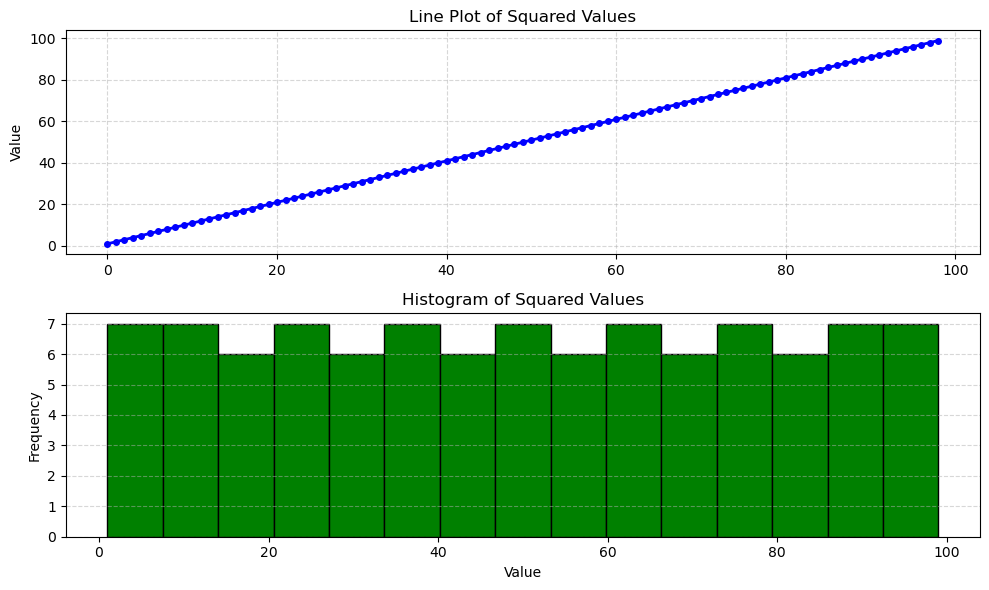

In [51]:
from numpy import sqrt

# square root transform a contrived quadratic time series
series = [i**2 for i in range(1,100)]

# sqrt transform
transform = sqrt(series)



# Create the figure
plt.figure(figsize=(10, 6))  # Wider and taller plot

# Line plot (top)
plt.subplot(2, 1, 1)                       
plt.plot(transform, color='blue', linewidth=2, marker='o', markersize=4)
plt.title('Line Plot of Squared Values')     
plt.ylabel('Value')                         
plt.grid(True, linestyle='--', alpha=0.5)    

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
plt.hist(transform, bins=15, color='green', edgecolor='black')
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()

In [52]:
df['Sqrt'] = sqrt(df['Passengers'])

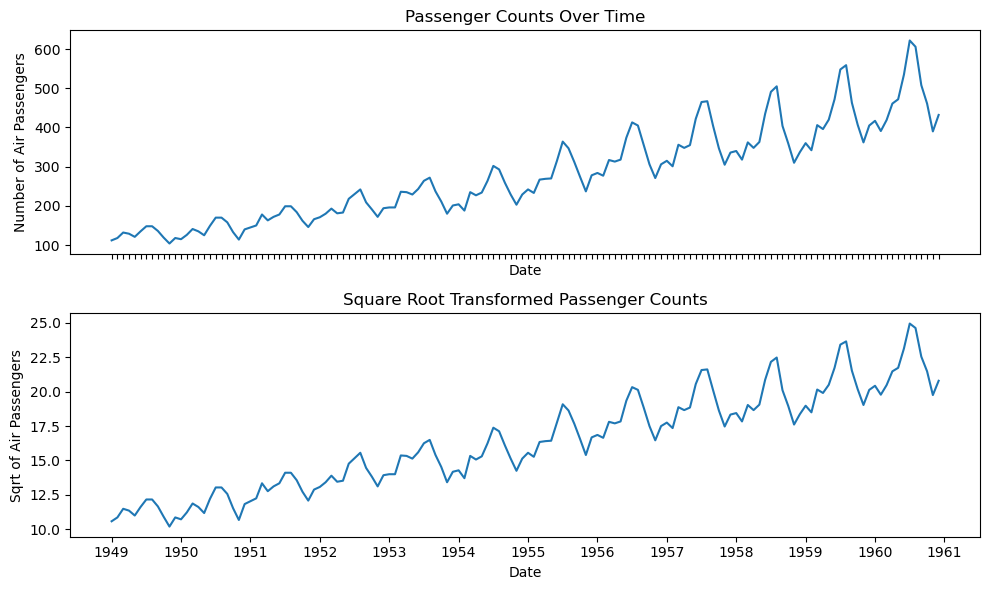

In [53]:
# Create the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))  # 2 subplots in one figure

# Line plot (top)
ax1.plot(df['Month'], df['Passengers'])           # Plot passengers
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Air Passengers')
ax1.set_title('Passenger Counts Over Time')
ax1.tick_params(labelbottom=False) 


# Line plot (bottom)
ax2.plot(df['Month'], df['Sqrt'])                 # Plot square root transformed values
ax2.set_xlabel('Date')
ax2.set_ylabel('Sqrt of Air Passengers')
ax2.set_title('Square Root Transformed Passenger Counts')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))


# Adjust layout and show plot
plt.tight_layout()
plt.show();

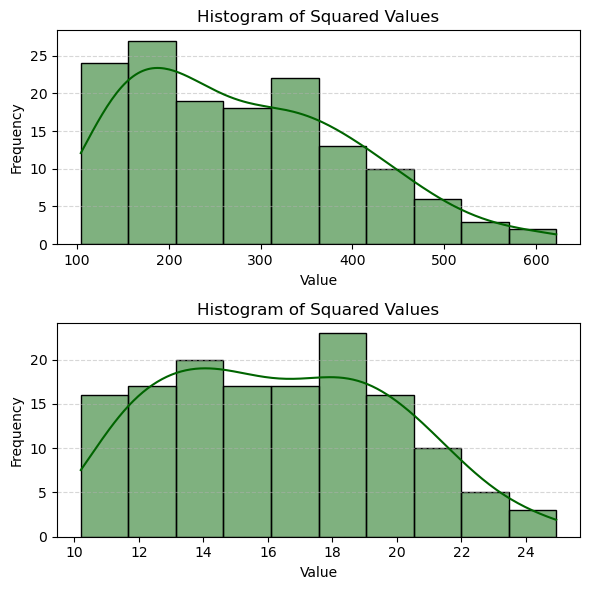

In [54]:
# Create the figure
plt.figure(figsize=(6, 6))

# Histogram (top)
plt.subplot(2, 1, 1)                                               
sns.histplot(df['Passengers'], bins=10, edgecolor='black', color='darkgreen', kde=True)
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)  

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
sns.histplot(df['Sqrt'], bins=10, edgecolor='black', color='darkgreen', kde=True)
plt.title('Histogram of Squared Values')     
plt.xlabel('Value')                          
plt.ylabel('Frequency')                      
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the combined plot
plt.tight_layout()
plt.show()